# Imports 

In [20]:
%load_ext autoreload
%autoreload 2
from paths import *
import torch; torch.manual_seed(0)
import torch.utils
import torch.distributions
import datetime as dt
from matplotlib import pyplot as plt
from src.SERS_dataset import IterDataset
from src.generate_data2 import pseudoVoigtSimulatorTorch
from src.models.autoencoder import Autoencoder
from src.plotting.AE_plotting import plot_loss
from src.trainers.AE_trainer import AE_trainer
# matplotlib seaborn style
plt.style.use('seaborn-whitegrid')
# import Image

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cuda = torch.cuda.is_available()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\andre\AppData\Local\Temp\ipykernel_7076\1098608896.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Generator 1 
Autoencoder trained on generator 1 where only $\alpha$ is varied

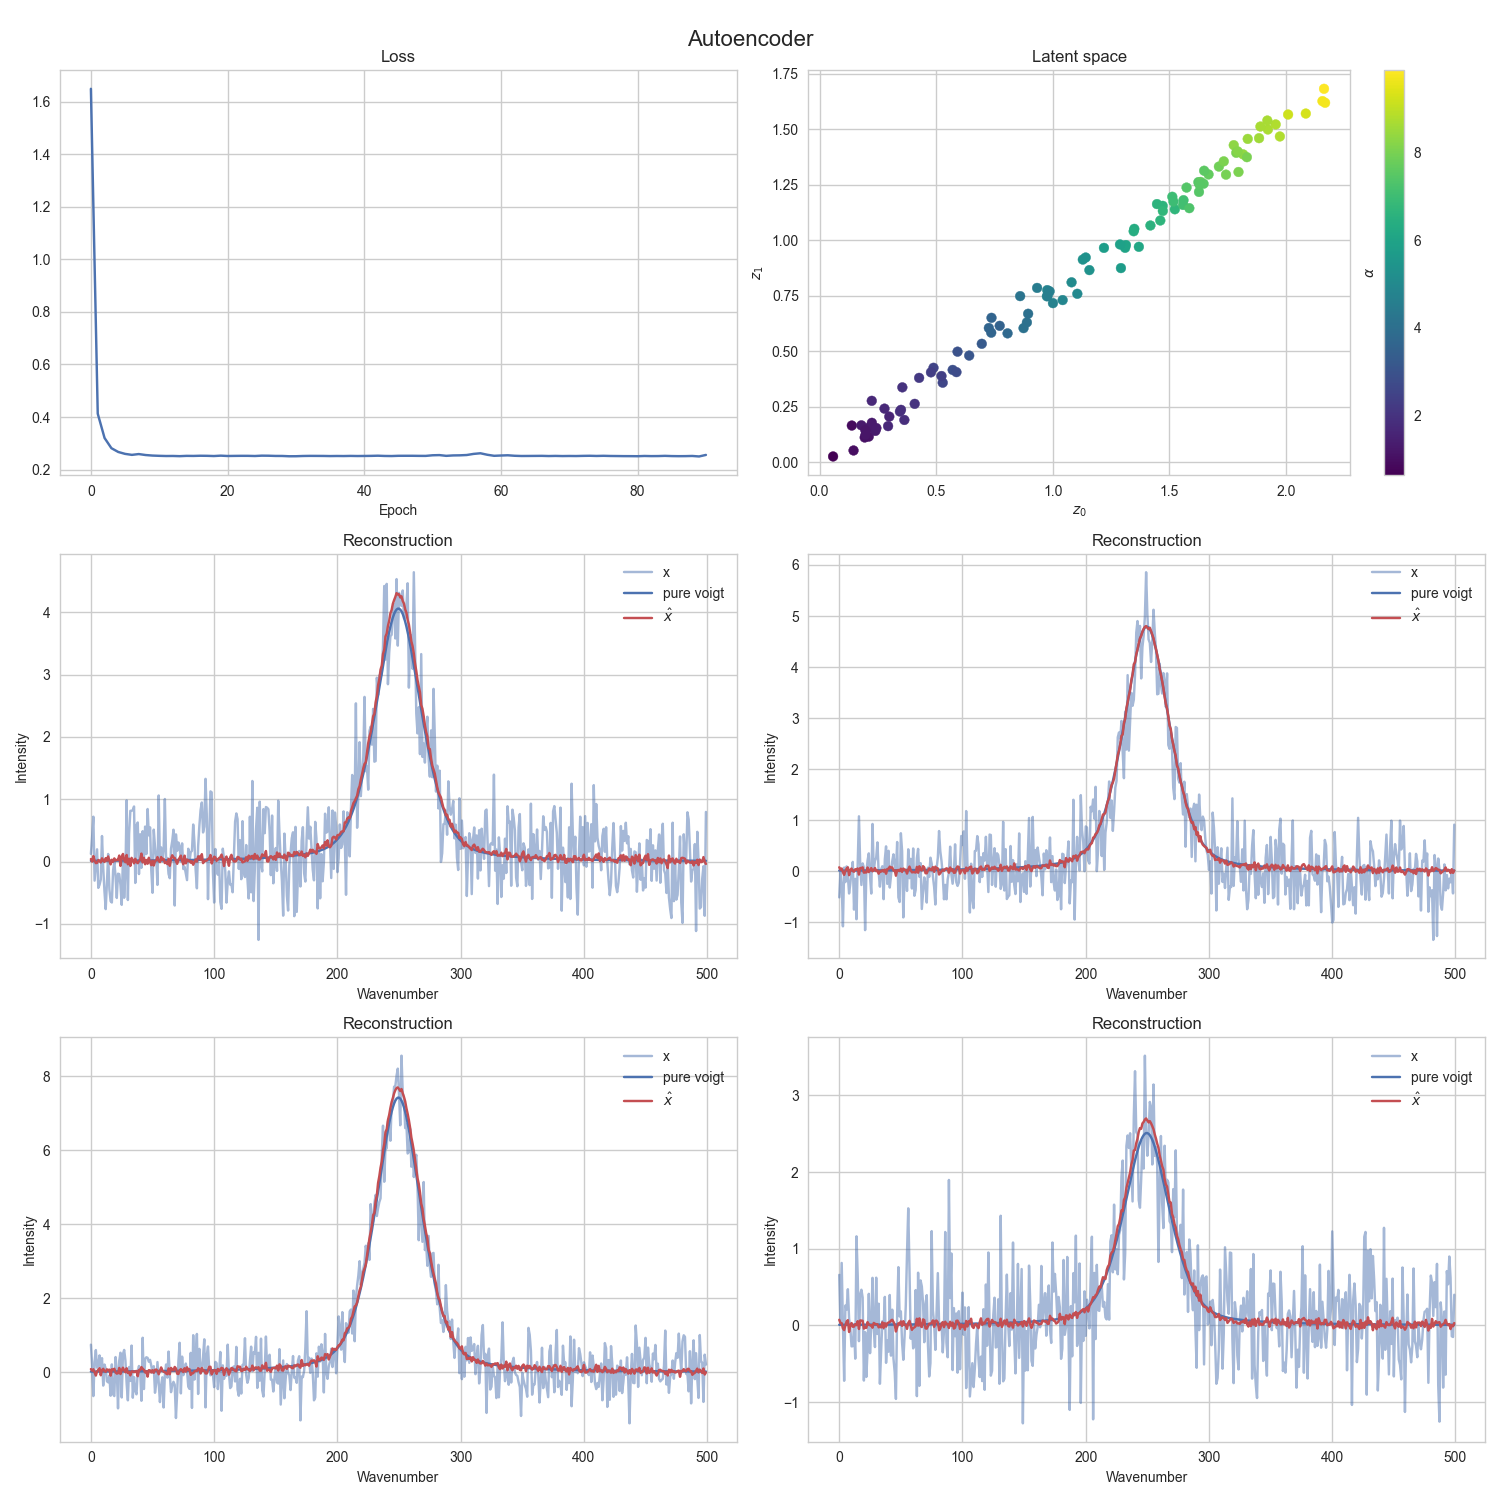

In [21]:
batch_size = 100
epochs = 100
num_batches_per_epoch = 10
learning_rate = 0.01
optimizer = 'adam'
latent_dims = 2

ps = pseudoVoigtSimulatorTorch(500)
generator = ps.predefined_generator(1)
dset_train = IterDataset(generator)
train_loader = torch.utils.data.DataLoader(dset_train, batch_size=batch_size, pin_memory=cuda)

# Load the SERS dataset
autoencoder = Autoencoder(latent_dims).to(device) 

autoencoder, train_loss = AE_trainer(autoencoder, train_loader, 
                                        optimizer=optimizer, epochs=epochs, 
                                        num_iterations_per_epoch=num_batches_per_epoch,
                                        lr=learning_rate, label="alpha")

In [22]:
train_loss[-1]

0.25093752958557825

# Generator 2
Autoencoder trained on generator 2 where only $c$ is varied

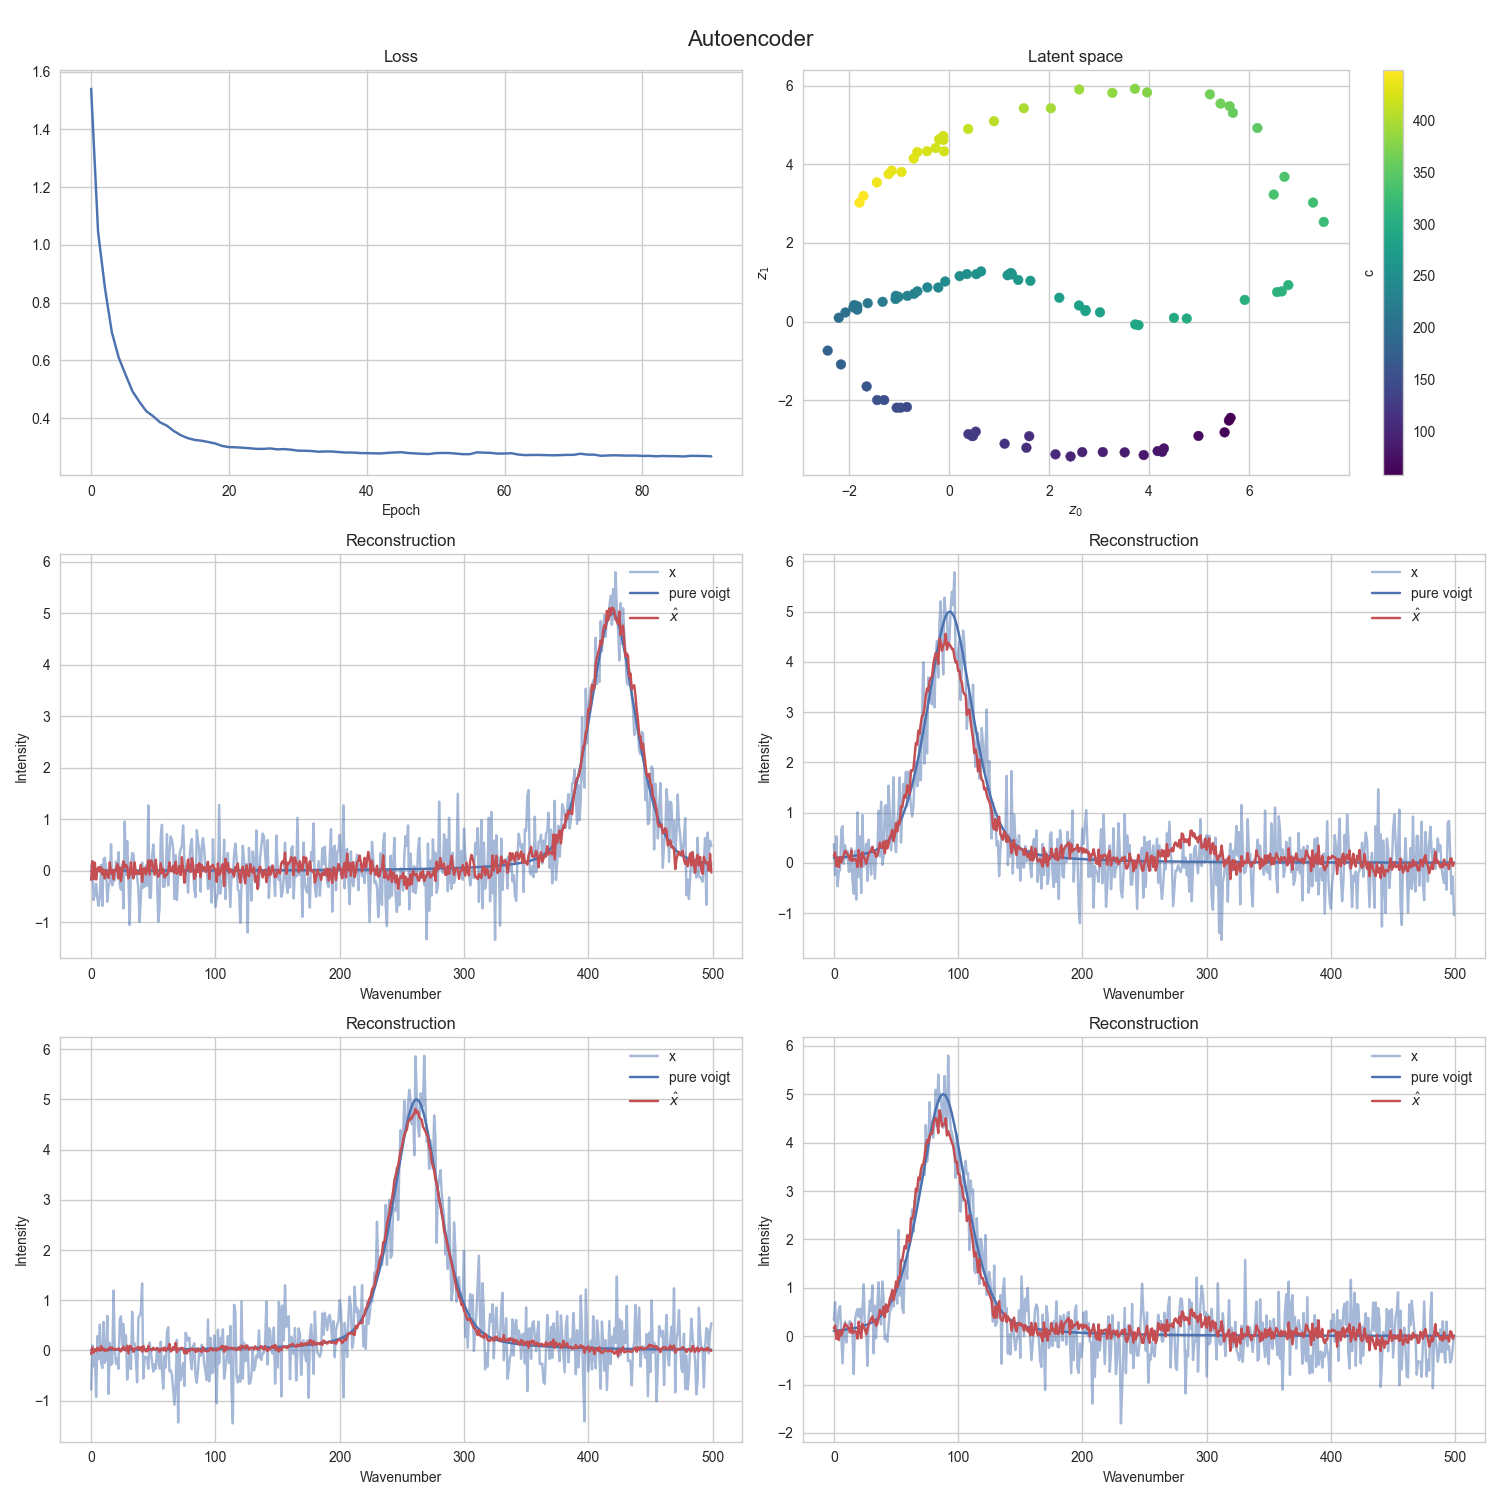

In [23]:
batch_size = 100
epochs = 100
num_batches_per_epoch = 10
learning_rate = 0.01
optimizer = 'adam'
latent_dims = 2

ps = pseudoVoigtSimulatorTorch(500)
generator = ps.predefined_generator(2)
dset_train = IterDataset(generator)
train_loader = torch.utils.data.DataLoader(dset_train, batch_size=batch_size, pin_memory=cuda)

# Load the SERS dataset
autoencoder = Autoencoder(latent_dims).to(device) 

autoencoder, train_loss = AE_trainer(autoencoder, train_loader, 
                                        optimizer=optimizer, epochs=epochs, 
                                        num_iterations_per_epoch=num_batches_per_epoch,
                                        lr=learning_rate, label="c")

In [24]:
train_loss[-1]

0.2730001888491891

# Generator 3
Autoencoder trained on generator 3 where both $\alpha$ and $c$ are varied

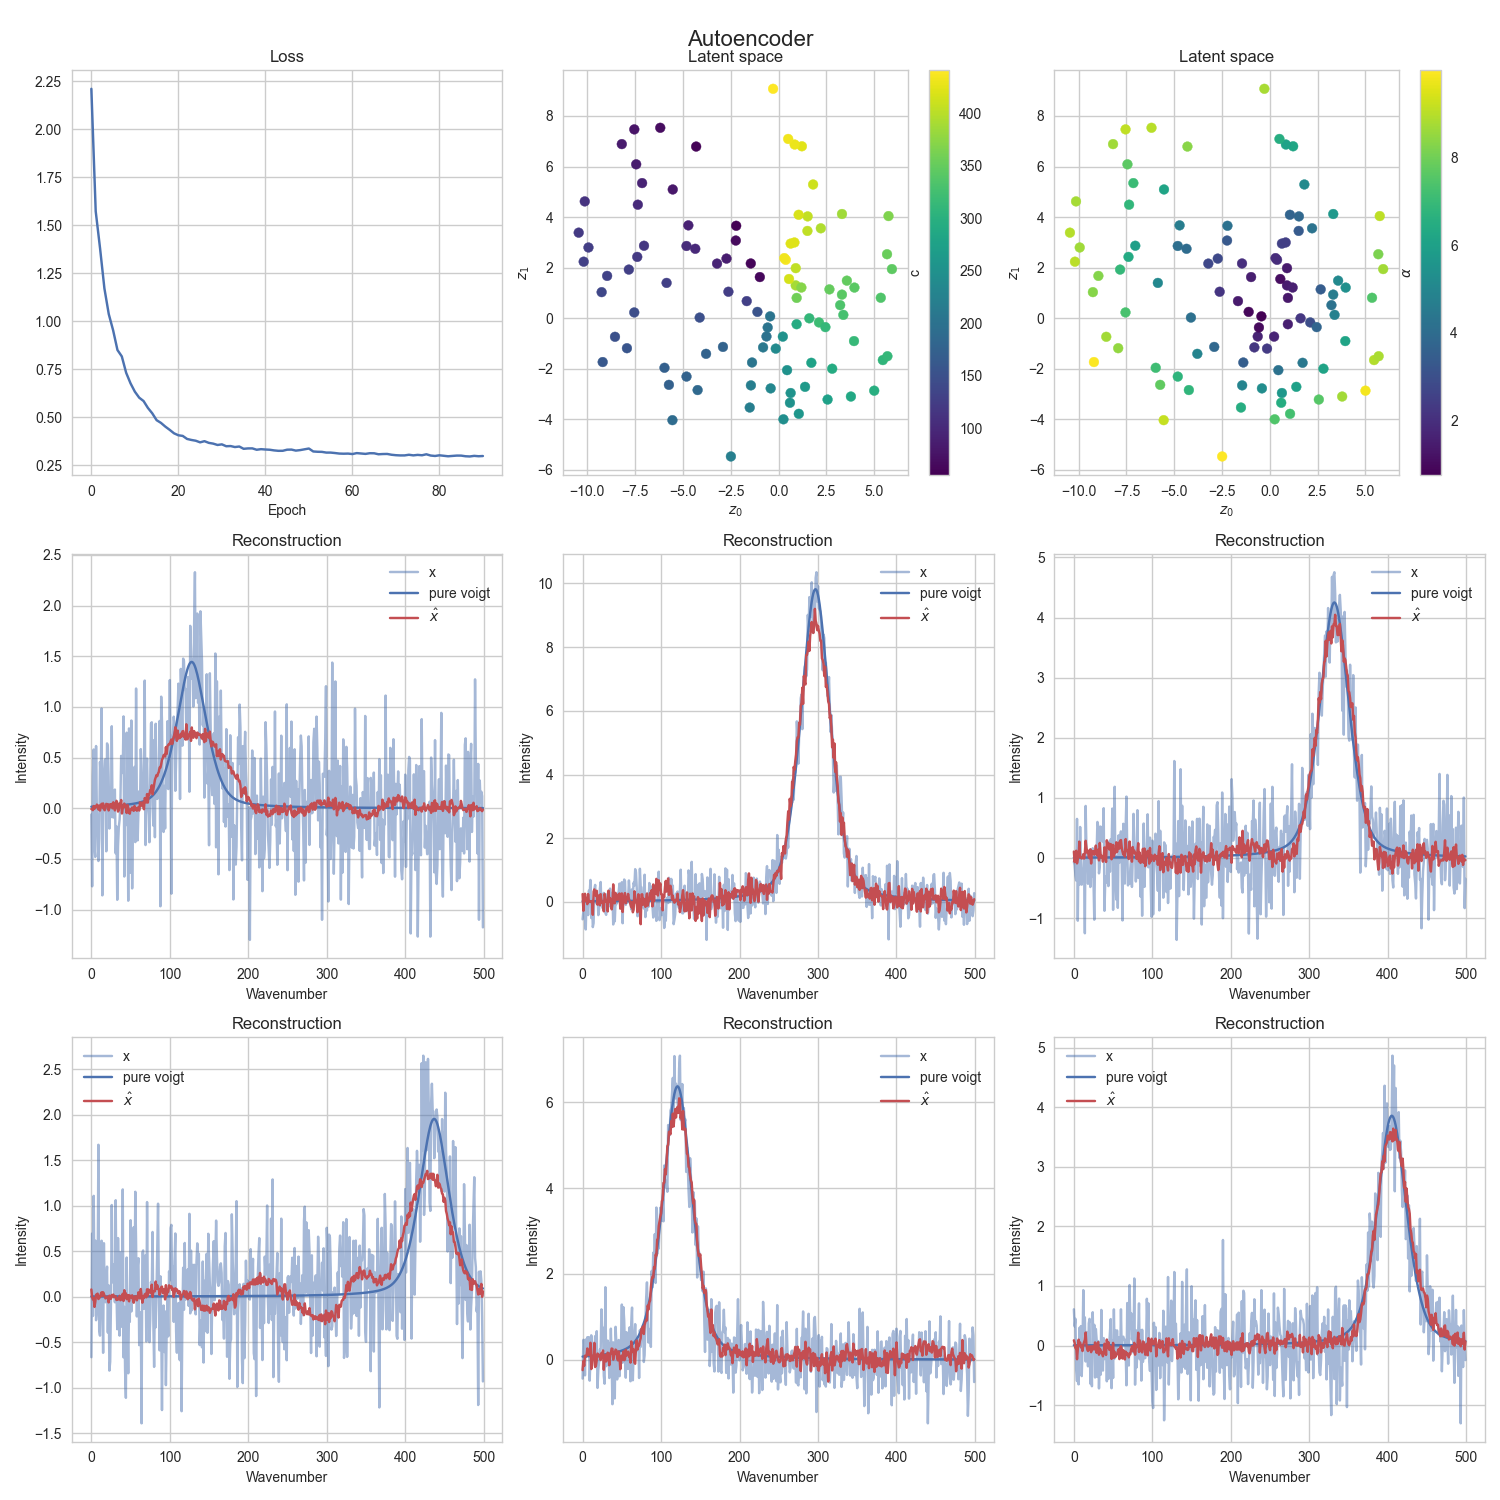

In [25]:
batch_size = 100
epochs = 100
num_batches_per_epoch = 10
learning_rate = 0.01
optimizer = 'adam'
latent_dims = 2

ps = pseudoVoigtSimulatorTorch(500)
generator = ps.predefined_generator(3)
dset_train = IterDataset(generator)
train_loader = torch.utils.data.DataLoader(dset_train, batch_size=batch_size, pin_memory=cuda)

# Load the SERS dataset
autoencoder = Autoencoder(latent_dims).to(device) 

autoencoder, train_loss = AE_trainer(autoencoder, train_loader, 
                                        optimizer=optimizer, epochs=epochs, 
                                        num_iterations_per_epoch=num_batches_per_epoch,
                                        lr=learning_rate, label=["c", "alpha"])

In [26]:
train_loss[-1]

0.2939463203603571